# Context

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("train.csv")

# Data quality assessment

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [6]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
mid_age_m = df[df['Sex']=='male']['Age'].median()
mid_age_f = df[df['Sex']=='female']['Age'].median()

df.loc[df['Sex']=='male', 'Age'] = df[df['Sex']=='male']['Age'].fillna(mid_age_m)
df.loc[df['Sex']=='female', 'Age'] = df[df['Sex']=='female']['Age'].fillna(mid_age_f)

# Data exploration

Text(0.5, 1.0, 'Соотношение мужчин и женщин')

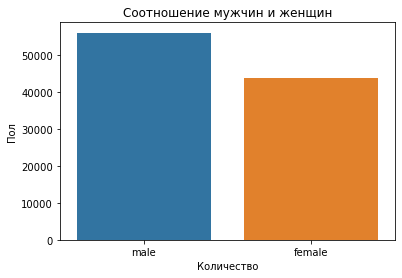

In [36]:
sns.countplot(x='Sex' ,data=df)
plt.xlabel('Количество')
plt.ylabel('Пол')
plt.title("Соотношение мужчин и женщин")

Text(0.5, 1.0, 'Соотношение мужчин и женщин с учетом класса пассажира')

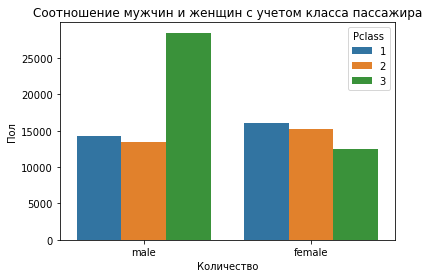

In [37]:
sns.countplot(x="Sex", hue="Pclass", data=df)
plt.xlabel('Количество')
plt.ylabel('Пол')
plt.title("Соотношение мужчин и женщин с учетом класса пассажира")

Text(0.5, 1.0, 'Распределение относительно возраста / класса')

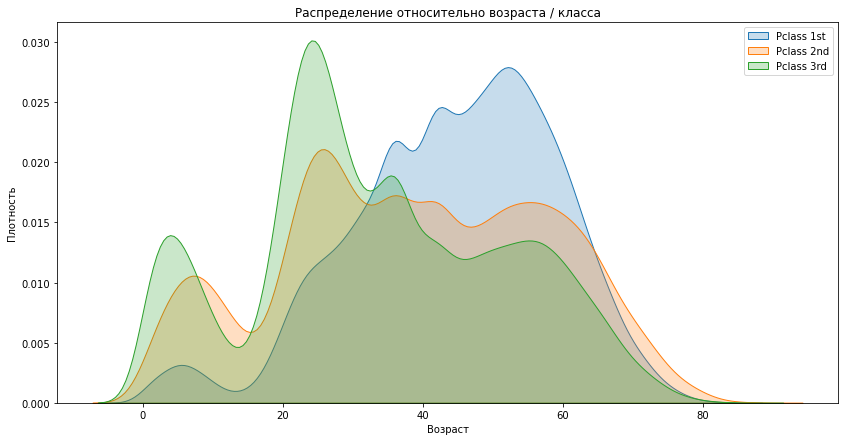

In [38]:
df_pc_one = df[df['Pclass'] == 1][['Survived', 'Age']]
df_pc_two = df[df['Pclass'] == 2][['Survived', 'Age']]
df_pc_three = df[df['Pclass'] == 3][['Survived', 'Age']]

plt.figure(figsize=(14,7))
sns.kdeplot(data=df_pc_one['Age'], label="Pclass 1st", shade=True)
sns.kdeplot(data=df_pc_two['Age'], label="Pclass 2nd", shade=True)
sns.kdeplot(data=df_pc_three['Age'], label="Pclass 3rd", shade=True)
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.title("Распределение относительно возраста / класса")

Text(0.5, 1.0, 'Кол-во билетов по стоимости')

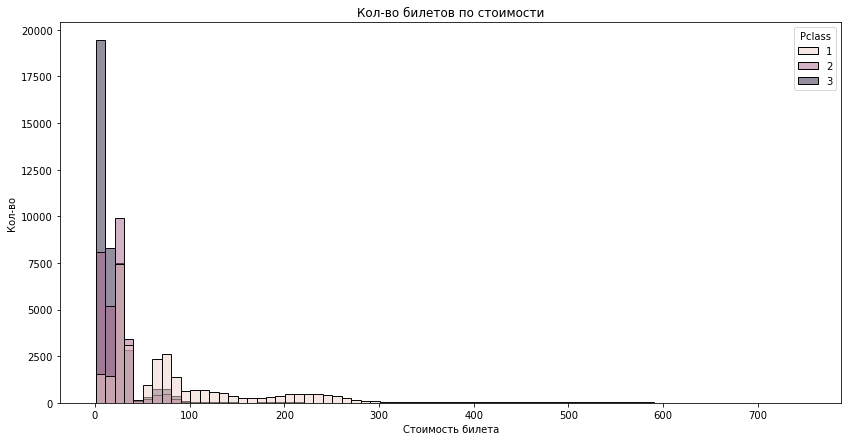

In [39]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='Fare', hue='Pclass', binwidth=10)
plt.xlabel('Стоимость билета')
plt.ylabel('Кол-во')
plt.title("Кол-во билетов по стоимости")

Взглянем на корреляцию между различными элементами данных

In [41]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.001956,-0.000893,-0.002673,0.001000,0.000411,-0.001036
Survived,0.001956,1.000000,-0.289723,0.104793,-0.007587,0.023352,0.187534
Pclass,-0.000893,-0.289723,1.000000,-0.255734,-0.051436,-0.041848,-0.417354
Age,-0.002673,0.104793,-0.255734,1.000000,-0.110397,-0.123156,0.107962
SibSp,0.001000,-0.007587,-0.051436,-0.110397,1.000000,0.213126,0.059358
Parch,0.000411,0.023352,-0.041848,-0.123156,0.213126,1.000000,0.061443
Fare,-0.001036,0.187534,-0.417354,0.107962,0.059358,0.061443,1.000000


In [ ]:
plt.figure(figsize=(14,7))
sns.swarmplot(x='Pclass', y='Age' , hue='Survived', data=df, size=10)
plt.legend()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

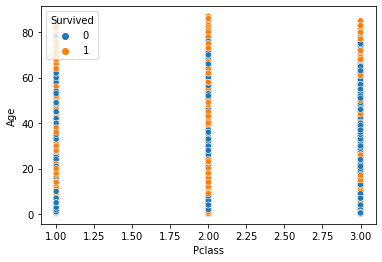

In [45]:
df_pc_one = df[df['Pclass'] == 1][['Survived', 'Age']]
df_pc_two = df[df['Pclass'] == 2][['Survived', 'Age']]
df_pc_three = df[df['Pclass'] == 3][['Survived', 'Age']]
sns.scatterplot(x='Pclass', y='Age' , hue='Survived', data=df)


# Summary

##### Вывод:
В результате анализа можно выдвинуть следующие предположения:
  * Нет гендерных предпочтений, однако большая часть пассажиров третьего класса - мужчины
  * Средний возраст пассажиров колеблется в диапазоне 20 - 60, однако ярка выражен различия для разных классов пассажиров (1 класс пожилые, 2 класс примерно одинаково, 3 класс молодые)
  * Большая часть билетов куплена менее чем за 50 у.е. Можно отметить, что все билеты дороже куплены преимущественно третьим классом. 
